In [35]:
import os
os.system('jupyter nbconvert --to html project.ipynb')

[NbConvertApp] Converting notebook project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 405321 bytes to project.html


0

Going to see from a dataset for people's preferred restaurants

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("data.csv")

def handle_rate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)


In [3]:
dataframe['rate'] = dataframe['rate'].apply(handle_rate)

print(dataframe['rate'].head())

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64


Text(0.5, 0, 'Type of restaurant')

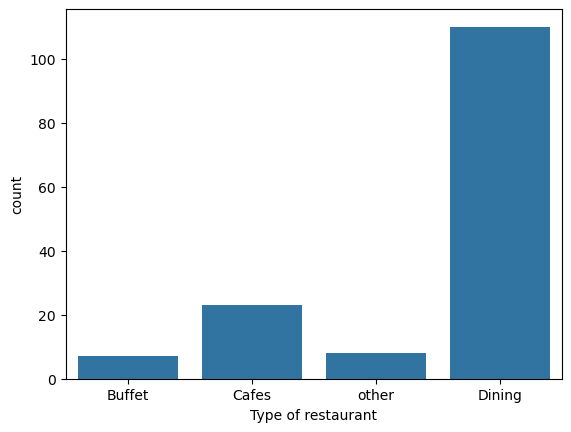

In [4]:
sns.countplot(x = dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Text(0.5, 1.0, 'Votes on preferred restaurants')

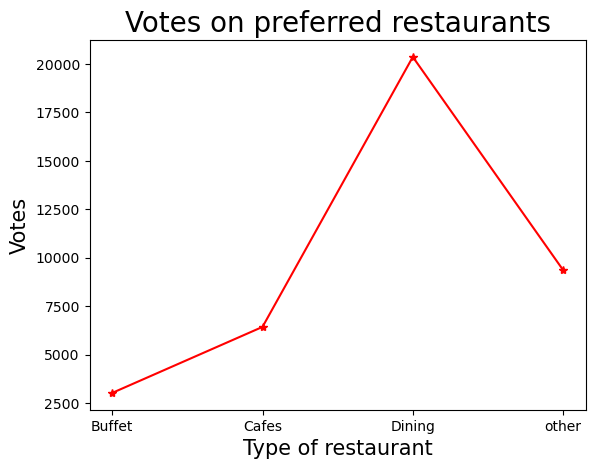

In [12]:
grouped_data = dataframe.groupby("listed_in(type)")['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result, c = "r", marker="*")
plt.xlabel('Type of restaurant', c='black', size = 15)
plt.ylabel('Votes', c = 'black', size = 15)
plt.title('Votes on preferred restaurants', size = 20)


Let's findout the maximum votes on a specific restaurant

In [16]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant name: " + restaurant_with_max_votes)

38    Restaurant name: Empire Restaurant
Name: name, dtype: object


Now we look if people prefer to do online ordering or not.

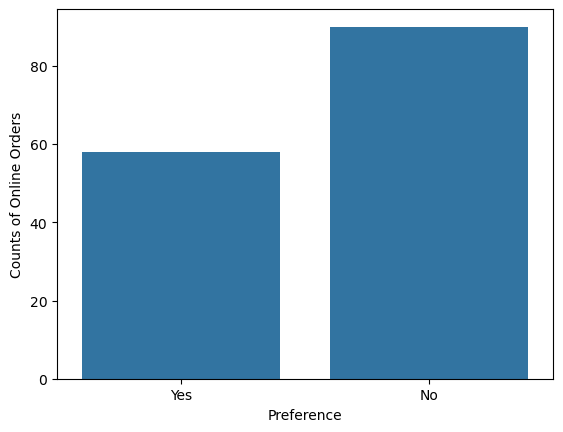

In [24]:
online_order_plot = sns.countplot(x = dataframe['online_order'])
plt.ylabel("Counts of Online Orders")
plt.xlabel("Preference")
plt.show()


Why don't we look at the ratings dsitribution overall.

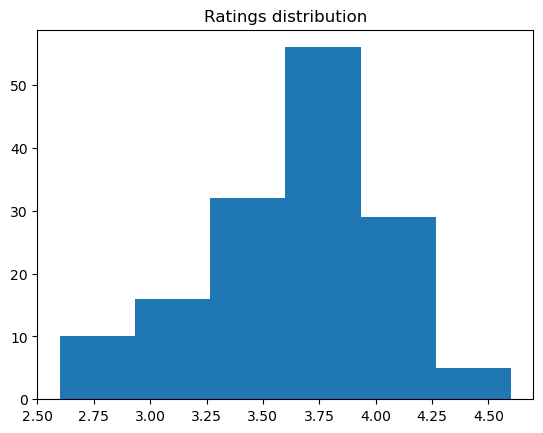

3.6331081081081082


In [27]:
plt.hist(dataframe['rate'], bins = 6)
plt.title("Ratings distribution")
plt.show()

average_rating = dataframe['rate'].mean()
print(average_rating)

Let's look at data for the approxmiate cost for two people

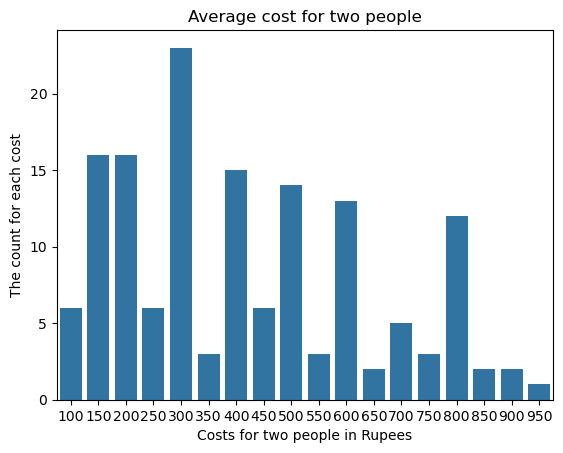

In [33]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)
plt.ylabel("The count for each cost")
plt.xlabel('Costs for two people in Rupees')
plt.title("Average cost for two people")
plt.show()